In [19]:
from scipy.io import loadmat
import numpy as np
from pathlib import Path

ds_root = Path("../data/vpgnet/")

mat = loadmat(ds_root / "scene_1/20160512_1329_00/000001.mat")["rgb_seg_vp"]
mat.shape

(480, 640, 5)

(array([194]), array([475]))

In [21]:
# count the number of .mat files in ../data/vpgnet/
import glob

len(glob.glob(str(ds_root / "*/*/*.mat")))

20836

20836it [01:45, 196.63it/s]


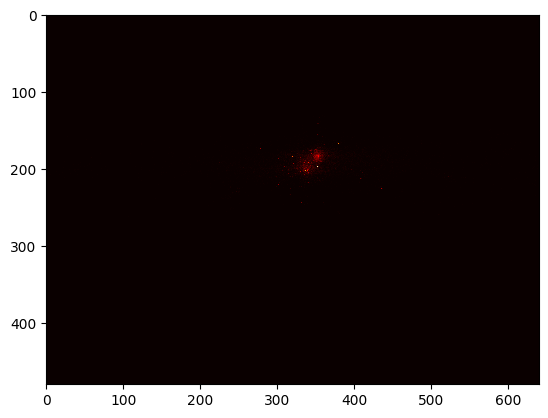

In [28]:
import matplotlib.pyplot as plt
from tqdm import tqdm

# iterate over all dirs and subirs in ds_root
# parse all vanishing points coordinates
# make a heatmap of vanishing points

heatmap = np.zeros((480, 640))

for mat_file in tqdm(ds_root.glob("**/*.mat")):
    mat = loadmat(mat_file)["rgb_seg_vp"]
    vp_y, vp_x = np.where(mat[:, :, -1] == 1)
    heatmap[vp_y, vp_x] += 1


plt.imshow(heatmap / heatmap.max(), cmap='hot', interpolation='nearest')
plt.show()

In [27]:
print(heatmap.max())
print(heatmap.min())
print(heatmap.mean())
print(heatmap.std())

156.0
0.0
0.062041015625
0.9900227537815581


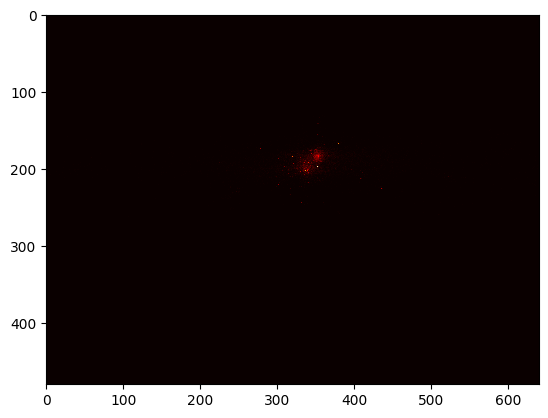

In [30]:
# scale heatmap between 0 and 1
norm_heatmap = (heatmap - heatmap.min()) / (heatmap.max() - heatmap.min())

plt.imshow(norm_heatmap, cmap='hot', interpolation='nearest')
plt.show()